# TensorFlow_LowerLevel_API_Basic
xiangjl
xjliww@163.com
2018/10/14 

文章参考：https://tensorflow.google.cn/programmers_guide/low_level_intro

## 1 简介

本指南旨在指导您使用低级别 TensorFlow API (TensorFlow Core) 开始编程。您可以学习执行以下操作：

    管理您自己的 TensorFlow 程序 (tf.Graph) 和 TensorFlow 运行时 (tf.Session)，而不是依靠 Estimator 来管理它们。
    使用 tf.Session 运行 TensorFlow 操作。
    在此低级别环境中使用高级别组件（数据集、层和 feature_columns）。
    构建自己的训练循环，而不是使用 Estimator 提供的训练循环。

我们建议尽可能使用更高阶的 API 构建模型。以下是 TensorFlow Core 为何很重要的原因：

    如果您能够直接使用低阶 TensorFlow 操作，实验和调试都会更直接。
    在使用更高阶的 API 时，能够理解其内部工作原理。


## 2 设置

在使用本指南之前，请先安装 TensorFlow。

要充分理解本指南中的内容，您应当具备以下方面的知识：

    如何使用 Python 编程。
    对阵列有所了解。
    理想情况下，最好对机器学习有一定的了解。

您随时可以启动 python，并按照以下演示进行操作。运行以下行来设置您的 Python 环境：

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

## 3 张量值

TensorFlow 中的核心数据单位是张量。一个张量由一组形成阵列（任意维数）的原始值组成。张量的阶是它的维数，而它的形状是一个整数元组，指定了阵列每个维度的长度。以下是张量值的一些示例：

In [6]:
3.  #a rank 0 tensor; a scalar with shape [],

[1., 2., 3.] # a rank 1 tensor; a vector with shape [3]

[[1., 2., 3.], [4., 5., 6.]]  # a rank 2 tensor; a matrix with shape [2, 3]

[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

TensorFlow 使用 numpy 阵列来表示张量值。

## 4 TensorFlow Core 演示
您可以将 TensorFlow Core 程序看作由两个互相独立的部分组成：

    构建计算图 (tf.Graph)。
    运行计算图（使用 tf.Session）。
    
### 4.1 图(Graph)

计算图是排列成一个图的一系列 TensorFlow 指令。图由两种类型的对象组成。

操作（简称“op”）：图的节点。操作描述了消耗和生成张量的计算。
    张量：图的边。它们代表将流经图的值。大多数 TensorFlow 函数会返回 tf.Tensors。

***重要提示：tf.Tensors 不具有值，它们只是计算图中元素的手柄。

我们来构建一个简单的计算图。最基本的指令是一个常量。构建指令的 Python 函数将一个张量值作为输入值。生成的指令不需要输入值。它在运行时输出的是被传递给构造函数的值。我们可以创建如下所示的两个浮点数常量 a 和 b：


In [7]:
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.0) # also tf.float32 implicitly
total = a + b
print(a)
print(b)
print(total)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("add:0", shape=(), dtype=float32)


打印语句会生成：

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("add:0", shape=(), dtype=float32)

请注意，打印张量并不会如您可能预期的那样输出值 3.0、4.0 和 7.0。上述语句只会构建计算图。这些 tf.Tensor 对象仅代表将要运行的操作的结果。

图中的每个指令都拥有唯一的名称。这个名称不同于使用 Python 分配给相应对象的名称。张量是根据生成它们的指令命名的，后面跟着输出索引，如上文的 "add:0" 所示。

### 4.2 TensorBoard

TensorFlow 提供了一个名为 TensorBoard 的实用程序。TensorBoard 的诸多功能之一是将计算图可视化。您只需要使用几个简单的命令就能轻松完成此操作。

首先将计算图保存为 TensorBoard 摘要文件，具体操作如下所示：

In [8]:
writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())

这将在当前目录中生成一个 event 文件，其名称格式如下：

events.out.tfevents.{timestamp}.{hostname}

现在，在新的终端中使用以下 shell 命令启动 TensorBoard：

tensorboard --logdir .

接下来，在您的浏览器中打开 TensorBoard 的图页面，您应该会看到与以下图形类似的图：
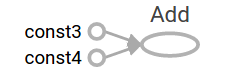
要详细了解 TensorBoard 的计算图可视化工具，请参阅 TensorBoard：图的直观展示。

### 4.3 会话 (Session)

要评估张量，您需要实例化一个 tf.Session 对象（非正式名称为会话）。会话会封装 TensorFlow 运行时的状态，并运行 TensorFlow 操作。如果说 tf.Graph 像一个 .py 文件，那么 tf.Session 就像一个 python 可执行对象。

下面的代码会创建一个 tf.Session 对象，然后调用其 run 方法来评估我们在上文中创建的 total 张量：

In [9]:
sess = tf.Session()
print(sess.run(total))

7.0


您可以将多个张量传递给 tf.Session.run。run 方法以透明方式处理元组或字典的任何组合，如下例所示：

In [10]:
print(sess.run({'ab':(a, b), 'total':total}))

{'ab': (3.0, 4.0), 'total': 7.0}


它返回的结果拥有相同的布局结构：

{'ab': (3.0, 4.0), 'total': 7.0}

在调用 tf.Session.run 期间，任何 tf.Tensor 都只有单个值。例如，以下代码调用 tf.random_uniform 来生成一个 tf.Tensor，后者会生成随机的三元素矢量（值位于 [0,1) 区间内）

In [11]:
vec = tf.random_uniform(shape=(3,))
out1 = vec + 1
out2 = vec + 2
print(sess.run(vec))
print(sess.run(vec))
print(sess.run((vec, out1, out2)))

[0.95510316 0.4241376  0.83991647]
[0.19749606 0.06921947 0.9127184 ]
(array([0.50425017, 0.3607762 , 0.7452526 ], dtype=float32), array([1.5042502, 1.3607762, 1.7452526], dtype=float32), array([2.50425  , 2.3607762, 2.7452526], dtype=float32))


部分 TensorFlow 函数会返回 tf.Operations，而不是 tf.Tensors。对指令调用 run 的结果是 None。您运行指令是为了产生副作用，而不是为了检索一个值。这方面的例子包括稍后将演示的初始化和训练操作。
每次调用 run 时，结果都会显示不同的随机值，但在单个 run 期间（out1 和 out2 接收到相同的随机输入值），结果显示的值是一致的：

[ 0.52917576  0.64076328  0.68353939]

[ 0.66192627  0.89126778  0.06254101]

(
   
   array([0.355803  , 0.13531041, 0.36421525], dtype=float32), 
   
   array([1.355803 , 1.1353104, 1.3642153], dtype=float32),
   
   array([2.355803 ,  2.1353104, 2.3642154], dtype=float32)
   
)


### 4.4 供给(Feed)

目前来讲，这个图不是特别有趣，因为它总是生成一个常量结果。图可以参数化以便接受外部输入，也称为占位符。占位符表示承诺在稍后提供值，它就像函数参数。

In [12]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
z = x + y

前面三行有点像函数。我们定义了这个函数的两个输入参数（x 和 y），然后对它们运行指令。我们可以使用 run 方法的 feed_dict 参数为占位符提供具体的值，从而评估这个具有多个输入的图：

In [13]:
print(sess.run(z, feed_dict={x: 3, y: 4.5}))
print(sess.run(z, feed_dict={x: [1, 3], y: [2, 4]}))

7.5
[3. 7.]


上述操作的结果是输出以下内容：

7.5
[ 3.  7.]

另请注意，feed_dict 参数可用于覆盖图中的任何张量。占位符和其他 tf.Tensors 的唯一不同之处在于如果没有为它们提供值，那么占位符会抛出错误。

## 5 数据集(Dataset)

占位符适用于简单的实验，但数据集是将数据流式传输到模型的首选方法。

要从数据集中获取可运行的 tf.Tensor，您必须先将其转换成 tf.data.Iterator，然后调用迭代器的 get_next 方法。

创建迭代器的最简单的方式是采用 make_one_shot_iterator 方法。例如，在下面的代码中，next_item 张量将在每次 run 调用时从 my_data 阵列返回一行：

In [14]:
my_data = [
    [0, 1,],
    [2, 3,],
    [4, 5,],
    [6, 7,],
]
slices = tf.data.Dataset.from_tensor_slices(my_data)
itor = slices.make_one_shot_iterator()
next_item = itor.get_next()

In [15]:
print(sess.run(next_item))

[0 1]


到达数据流末端时，Dataset 会抛出 OutOfRangeError。例如，下面的代码会一直读取 next_item，直到没有数据可读：

while True:
  try:
    print(sess.run(next_item))
  except tf.errors.OutOfRangeError:
    break

如果 Dataset 依赖于有状态操作，则可能需要在使用迭代器之前先初始化它，如下所示：

In [16]:
r = tf.random_normal([10,3])
dataset = tf.data.Dataset.from_tensor_slices(r)
iterator = dataset.make_initializable_iterator()
next_row = iterator.get_next()

sess.run(iterator.initializer)
while True:
  try:
    print(sess.run(next_row))
  except tf.errors.OutOfRangeError:
    break


[-0.41176027  1.0784054  -0.3680334 ]
[ 0.8959008  1.0963172 -0.4632479]
[-0.28124255  1.0320628  -0.7933211 ]
[-0.6821138  0.6746572  1.1010113]
[-1.5017749 -0.6715717  0.9798447]
[ 0.32035723  0.44352624 -1.6000073 ]
[-0.3110048 -0.6508491  1.4643897]
[-1.86328    0.939101  -0.3264654]
[-0.68554914 -0.84203994 -0.08805015]
[-0.61839926  1.280179    0.85706055]


要详细了解数据集和迭代器，请参阅导入数据。https://tensorflow.google.cn/programmers_guide/datasets

## 6 层(Layer)

可训练的模型必须修改图中的值，以便在输入相同值的情况下获得新的输出值。将可训练参数添加到图中的首选方法是层。

层将变量和作用于它们的操作打包在一起。例如，密集连接层会对每个输出对应的所有输入执行加权和，并应用激活函数（可选）。连接权重和偏差由层对象管理。


### 6.1 创建层

下面的代码会创建一个 Dense 层，该层会接受一批输入矢量，并为每个矢量生成单一的输出值。要将层应用于输入值，请将该层当做函数来调用。例如

In [82]:
x = tf.placeholder(tf.float32, shape=[None, 3])
linear_model = tf.layers.Dense(units=1)
y = linear_model(x)

层会检查其输入数据，以确定其内部变量的大小。因此，我们必须在这里设置 x 占位符的形状，以便层构建正确大小的权重矩阵。

我们现在已经定义了输出值 y 的计算，在我们运行计算之前，还需要处理一个细节。

### 6.2 初始化层

层包含的变量必须先初始化，然后才能使用。尽管可以单独初始化各个变量，但您也可以轻松地初始化一个 TensorFlow 图中的所有变量（如下所示）：

In [83]:
init = tf.global_variables_initializer()
sess.run(init)

***重要提示：调用 tf.global_variables_initializer 仅会创建并返回 TensorFlow 操作的句柄。当我们使用 tf.Session.run 运行该操作时，该操作将初始化所有全局变量。

另请注意，此 global_variables_initializer 仅会初始化创建初始化程序时图中就存在的变量。因此您应该在构建图表的最后一步添加初始化程序。

### 6.3 执行层

我们现在已经完成了层的初始化，可以像处理任何其他张量一样评估 linear_model 的输出张量了。例如，下面的代码：

In [90]:
print(sess.run(y, {x: [[1, 2, 3],[4, 5, 6]]}))

[[ -4.8909655]
 [-10.583069 ]]


会生成一个两元素输出向量，如下所示：

[[-3.41378999]

 [-9.14999008]]

### 6.4 层函数的快捷方式
对于每个层类（如 tf.layers.Dense)，TensorFlow 还提供了一个快捷函数（如 tf.layers.dense）。两者唯一的区别是快捷函数版本是在单次调用中创建和运行层。例如，以下代码等同于较早的版本：

In [92]:
x = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.layers.dense(x, units=1)

init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(y, {x: [[1, 2, 3], [4, 5, 6]]}))

[[1.9098539]
 [5.0244675]]


尽管这种方法很方便，但无法访问 tf.layers.Layer 对象。这会让自省和调试变得更加困难，并且无法重复使用相应的层。

## 7 特征列

使用特征列进行实验的最简单方法是使用 tf.feature_column.input_layer 函数。此函数只接受密集列作为输入，因此要查看类别列的结果，您必须将其封装在 tf.feature_column.indicator_column 中。例如：

In [94]:
features = {
    'sales' : [[5], [10], [8], [9]],
    'department': ['sports', 'sports', 'gardening', 'gardening']}

department_column = tf.feature_column.categorical_column_with_vocabulary_list(
        'department', ['sports', 'gardening'])
department_column = tf.feature_column.indicator_column(department_column)

columns = [
    tf.feature_column.numeric_column('sales'),
    department_column
]

inputs = tf.feature_column.input_layer(features, columns)

运行 inputs 张量会将 features 解析为一批向量。

特征列和层一样具有内部状态，因此通常需要将它们初始化。类别列会在内部使用对照表，而这些表需要单独的初始化操作 tf.tables_initializer

In [97]:
var_init = tf.global_variables_initializer()
table_init = tf.tables_initializer()
sess = tf.Session()
sess.run((var_init, table_init))

(None, None)

初始化内部状态后，您可以像运行任何其他 tf.Tensor 一样运行 inputs：

In [99]:
print(sess.run(inputs))

[[ 1.  0.  5.]
 [ 1.  0. 10.]
 [ 0.  1.  8.]
 [ 0.  1.  9.]]


这显示了特征列如何打包输入矢量，并将独热“department”作为第一和第二个索引，将“sales”作为第三个索引。

## 8 训练
您现在已经了解 TensorFlow 核心部分的基础知识了，我们来手动训练一个小型回归模型吧。

### 8.1 定义数据

我们首先来定义一些输入值 x，以及每个输入值的预期输出值 y_true：

In [100]:
x = tf.constant([[1], [2], [3], [4]], dtype=tf.float32)
y_true = tf.constant([[0], [-1], [-2], [-3]], dtype=tf.float32)

### 8.2 定义模型

接下来，建立一个简单的线性模型，其输出值只有 1 个：

In [102]:
linear_model = tf.layers.Dense(units=1)

y_pred = linear_model(x)

您可以如下评估预测值：

In [104]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(y_pred))


[[0.42472517]
 [0.84945035]
 [1.2741755 ]
 [1.6989007 ]]


该模型尚未接受训练，因此四个“预测”值并不理想。以下是我们得到的结果，您自己的输出应该有所不同。

### 8.3 损失
要优化模型，您首先需要定义损失。我们将使用均方误差，这是回归问题的标准损失。

虽然您可以使用较低级别的数学运算手动定义，但 tf.losses 模块提供了一系列常用的损失函数。您可以使用它来计算均方误差，具体操作如下所示：

In [106]:
loss = tf.losses.mean_squared_error(labels=y_true, predictions=y_pred)

print(sess.run(loss))

9.100188


运行，这会生成一个损失值。

### 8.4 训练

TensorFlow 提供了优化器来执行标准的优化算法。这些优化器被实现为 tf.train.Optimizer 的子类。它们会逐渐改变每个变量，以便将损失最小化。最简单的优化算法是梯度下降法，由 tf.train.GradientDescentOptimizer 实现。它会根据损失相对于变量的导数大小来修改各个变量。例如：

In [109]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

该代码构建了优化所需的所有图组件，并返回一个训练指令。该训练指令在运行时会更新图中的变量。您可以按以下方式运行该指令：

In [20]:
for i in range(100):
  _, loss_value = sess.run((train, loss))
  if i % 10 == 0:
    print(loss_value)

0.030190578
0.028433332
0.026778348
0.025219724
0.023751806
0.022369325
0.021067303
0.019841079
0.01868623
0.017598601


由于 train 是一个指令而不是张量，因此它在运行时不会返回一个值。为了查看训练期间损失的进展，我们会同时运行损失张量。

### 8.5 完整程序

In [18]:
x = tf.constant([[1], [2], [3], [4]], dtype=tf.float32)
y_true = tf.constant([[0], [-1], [-2], [-3]], dtype=tf.float32)

linear_model = tf.layers.Dense(units=1)

y_pred = linear_model(x)
loss = tf.losses.mean_squared_error(labels=y_true, predictions=y_pred)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for i in range(100):
  _, loss_value = sess.run((train, loss))
  if i % 10 == 0:
    print(loss_value)

print(sess.run(y_pred))

4.196773
0.2003301
0.09159237
0.08374959
0.07880994
0.07422109
0.069901
0.06583239
0.0620006
0.058391828
[[-0.37865502]
 [-1.1834843 ]
 [-1.9883136 ]
 [-2.7931428 ]]


## 9 后续步骤
要详细了解如何使用 TensorFlow 构建模型，请参阅以下内容：

    自定义 Estimator，了解如何使用 TensorFlow 构建自定义模型。掌握 TensorFlow Core 知识有助于理解和调试您自己的模型。
    https://tensorflow.google.cn/get_started/custom_estimators

如果您想详细了解 TensorFlow 的内部工作原理，请参阅以下文档。这些文档深入探讨了这篇文章中提及的许多主题：

    图和会话 https://tensorflow.google.cn/programmers_guide/graphs
    张量 https://tensorflow.google.cn/programmers_guide/tensors
    变量 https://tensorflow.google.cn/programmers_guide/variables
    保存和恢复 https://tensorflow.google.cn/programmers_guide/saved_model
